# Ensemble Methods

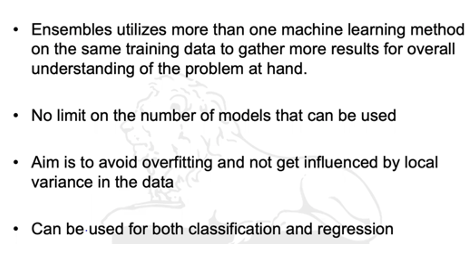

- It utilizes more than 1 ML method e.g. u have d.tree, lr, svm & aim could be prediction for a classification or regression problem.
- There is no limit on number of models that can be used but generally 3-5 or 3-4 models is ok as u get enough picture of what could be prediction.
- The gap b/w the training & test error is overfitting & ensemble technique helps to avoid overfit.

# Types of Ensemble Methods

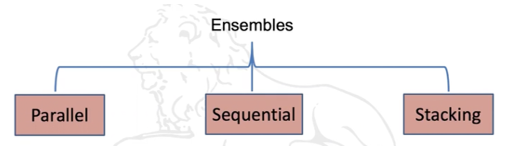


In day to day activities we use 1st two i.e. Parallel and Sequential Ensemble methods.

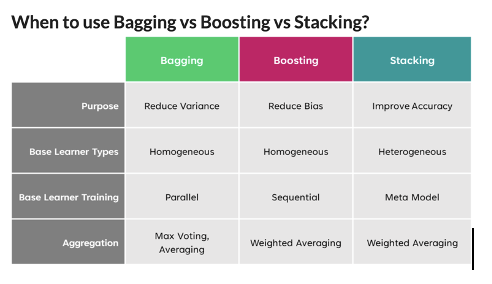

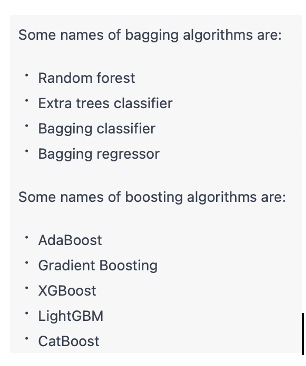

# ====Intro to Parallel Ensembles=============

## 1. Parallel Ensembles 

### Bagging algorithm (also called as  Bootstrap aggregation algorithm) is a specific type of parallel ensemble that uses bootstrap sampling to generate the subsets of the training data, then train seperate model on each bootstrap sample & aggregate predictions from each model to generate final prediction.

- <font color=blue>*When bagging is used with decision trees, the resulting parallel ensemble is called a random forest.*
    
- Bagging has been applied to a wide range of machine learning algorithms, including neural networks, support vector machines, and random forests.

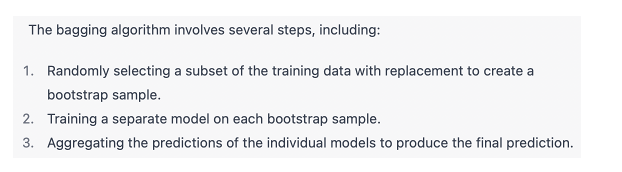

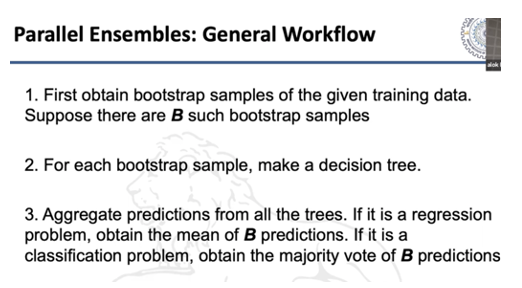

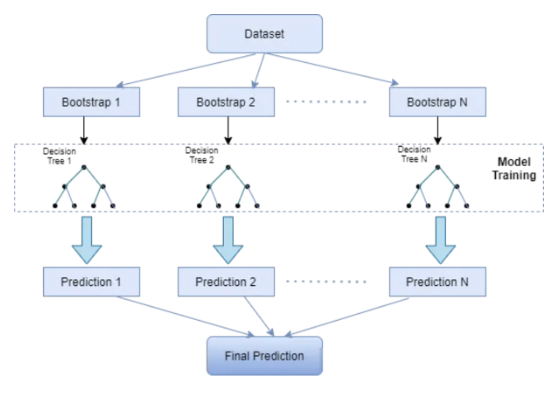

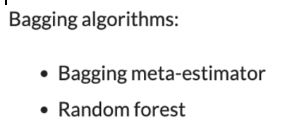

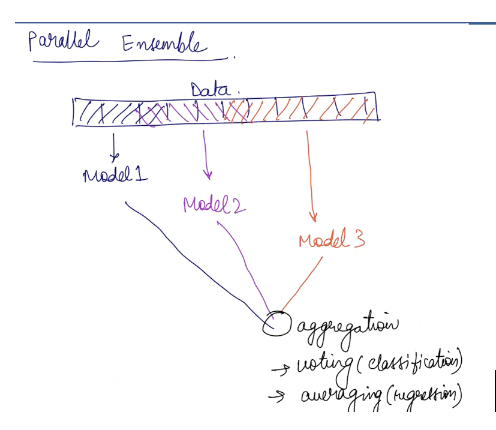

- Here Model1, Model2, Model3 are independent. The only link b/w 2 models could be in terms of training data where some training data might overlap i.e. present in both models as it is `bootstrap sampling with replacement`.
- The models work more or less in parallel fashion.
- Model2 is not deriving any information from Model1 or Model3 is not deriving any information from Model1 and Model2.

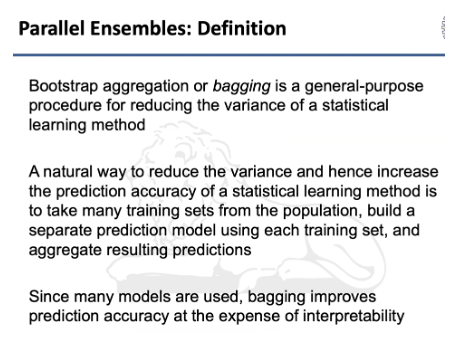

Above population is referring to whole dataset u have.

### Bootstrap Sampling (It is With replacement)

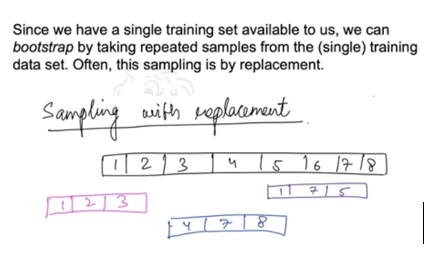

The term "bootstrap" is used because the method involves using the data itself to "pull up" new samples that can be used for analysis. In other words, the bootstrap samples are generated from the original data, and therefore reflect the same patterns and relationships in the data. When generating a bootstrap sample, observations are randomly selected from the original dataset with replacement, meaning that some observations may be selected multiple times, while others may not be selected at all.By using these bootstrap samples, statisticians can estimate the variability of a statistic or model parameter without making assumptions about the underlying population distribution.

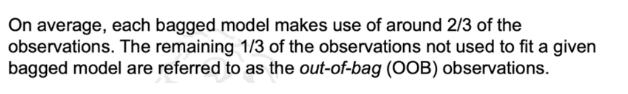

In summary, the size of a bootstrap sample refers to the number of observations in each sample, while the `number of bootstrap samples refers to the number of times the bootstrap process is repeated`. Both of these factors can affect the accuracy and precision of estimates obtained through bootstrapping.

### Accumulating predictions in case of Regression & Classification

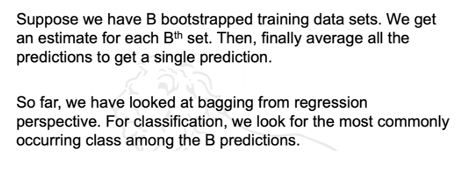

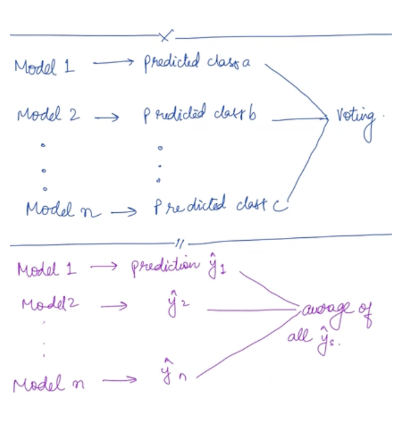

# Decision Tree vs Random Forest

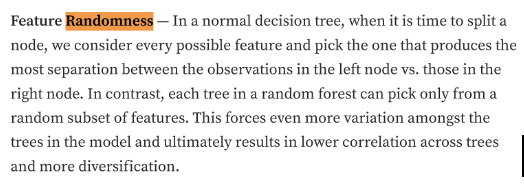

# Bagging vs Random Forest

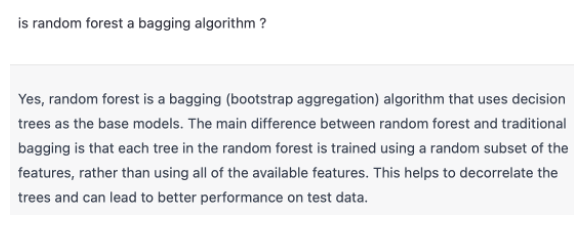

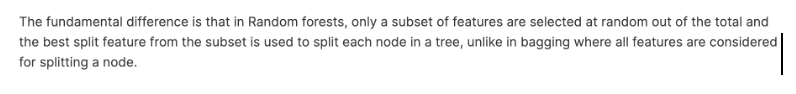

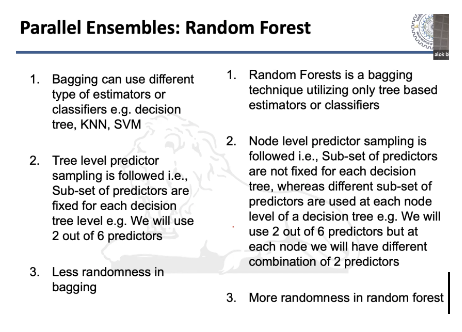

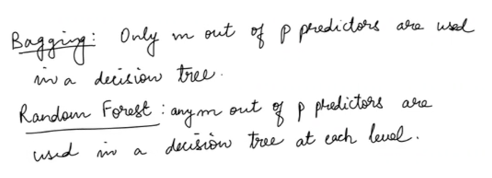

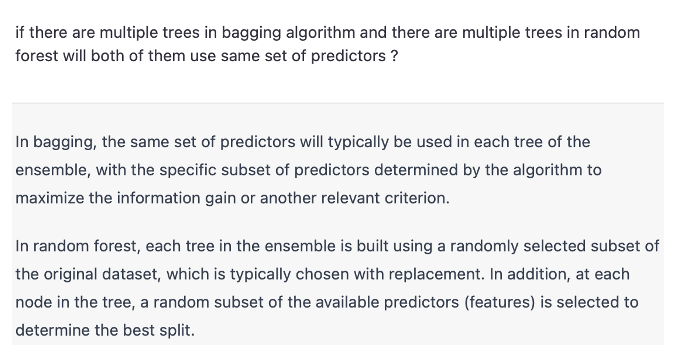

### Benefits of Random Forest

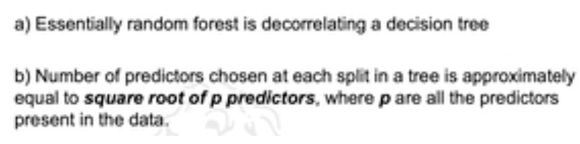

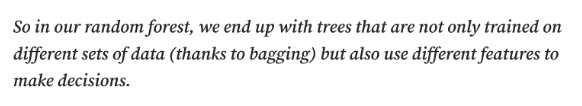

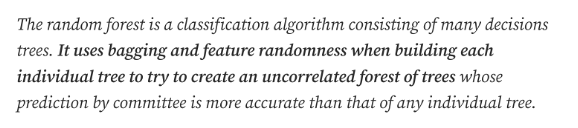

## OOB - Out of Bag Error (Estimating test error of bagged model)

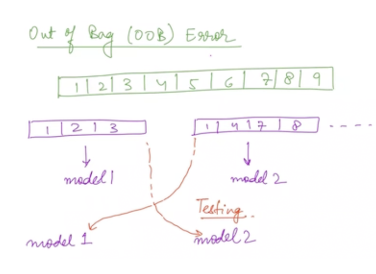

- 1 to 9 as total dataset observations
- if 1,2,3 are used for 1st training set then remaining 4 to 9 will be out of bag observations, 
- similarly if 1,4,7,8 r observations selected for 2nd training set then 2,3,5,6,9 will be out of bag observations.
- You can test ur model on OOB observations.

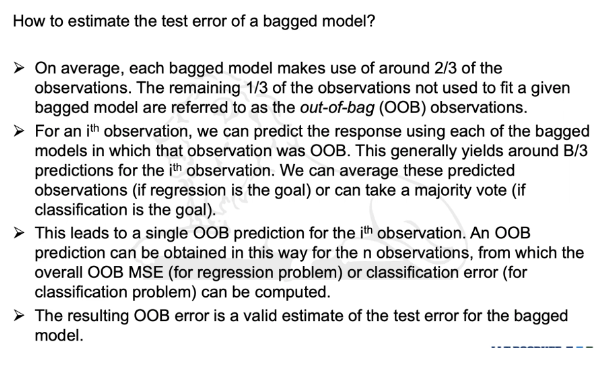

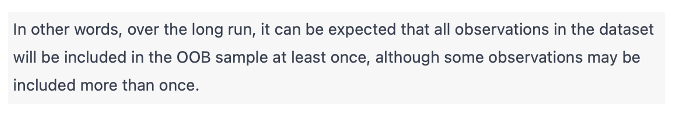

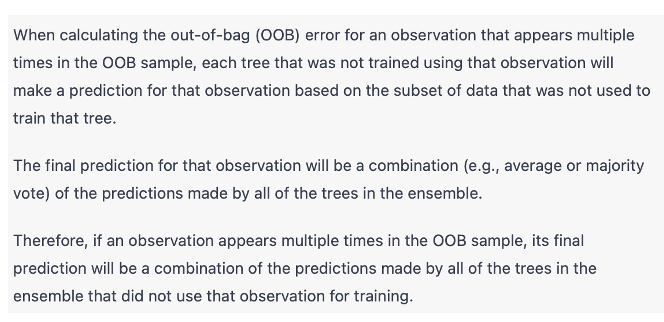

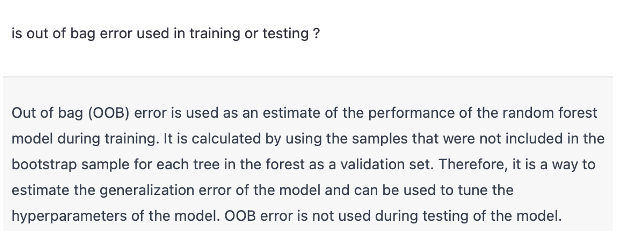

# =========Algorithm Random Forest ===========

# Random Forest Practical [This is a bagging Algorithm along with feature randomness]

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('datasets/employees_attrition.csv')
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# target variable is attrition indicating if employee is in company or not
# 1 implies employee has left the company
# 0 implies employee is in the company

In [6]:
ohe = pd.get_dummies(data, drop_first=True)

y = 'Attrition'
x = ohe.columns.drop(y)


xtrain, xtest, ytrain, ytest = train_test_split(ohe[x], ohe[y], test_size=.2, random_state=1)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1176, 47), (1176,), (294, 47), (294,))

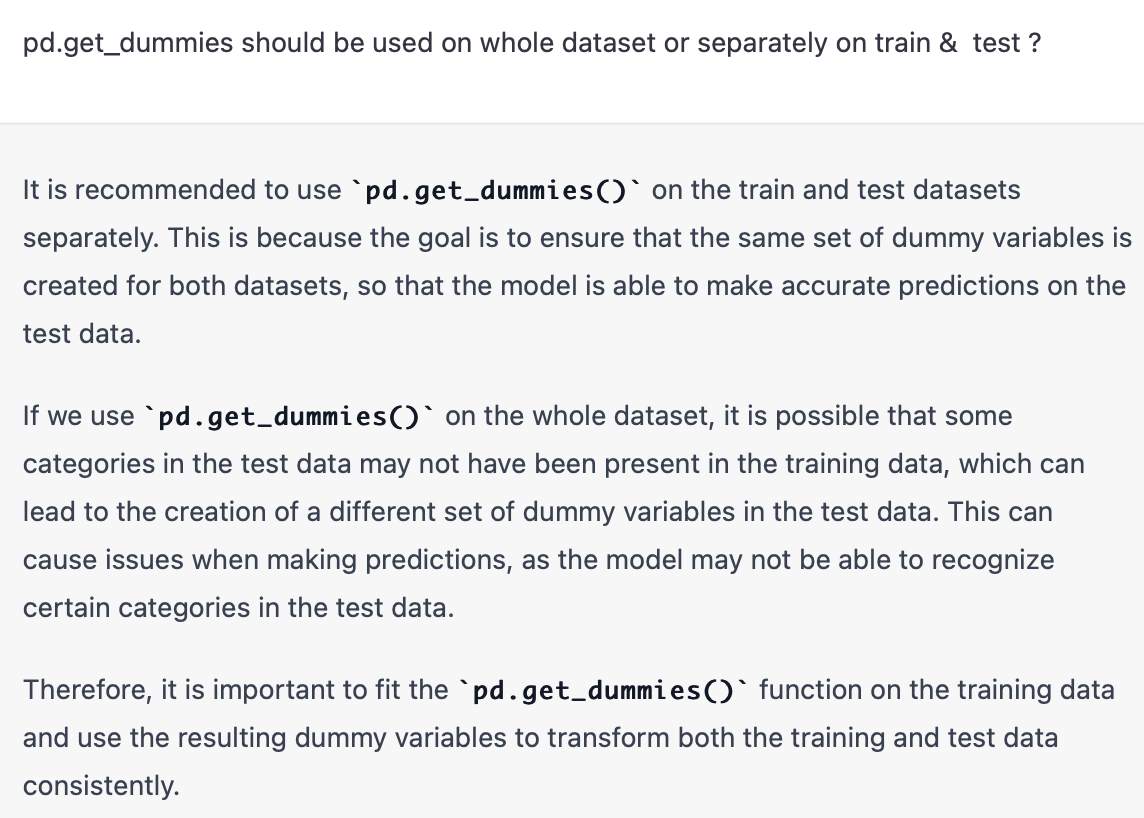

# Simple Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)

## Plot the whole decision tree

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

def drawtree(tree_name,training_cols):
    plt.figure(figsize=(50,10))
    tree.plot_tree(tree_name, feature_names=training_cols,filled=True) 
    # 'plot_tree' a method of tree library
    

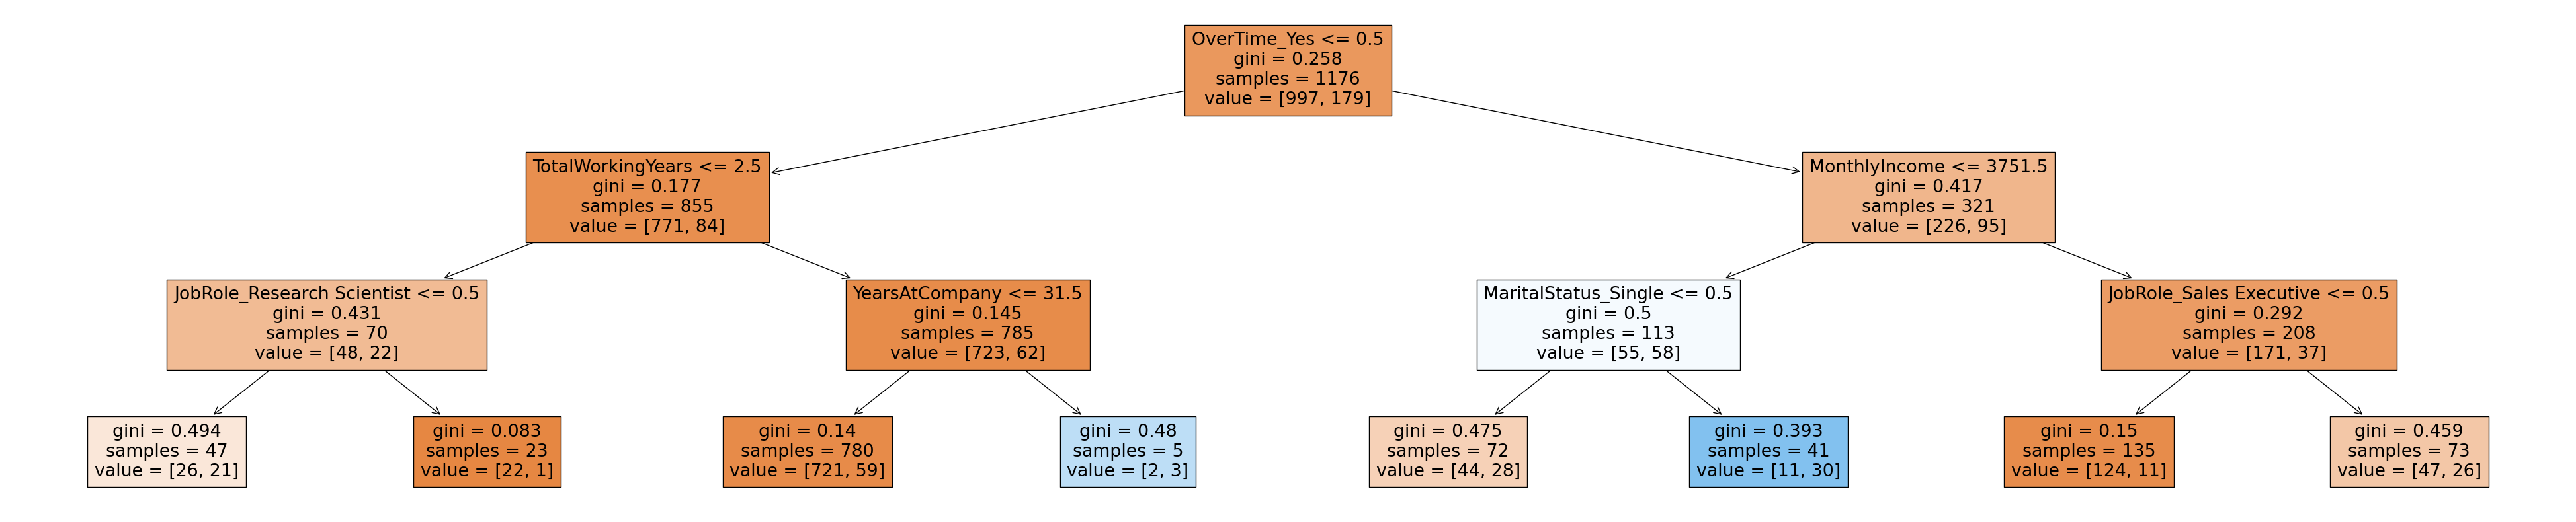

In [9]:
drawtree(dt,xtrain.columns)

# Building Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=5,   # 5 trees
                            max_depth=3, 
                            random_state=1).fit(xtrain, ytrain) 
# n_estimators: no of trees to build


- Random Forest is a bagging technique & in the bagging technique you have different subsets of data with replacement from whole training data & correspondingly a model for each subset of data.
- For a random forest with n_estimators trees, there will be n_estimators different bootstrapped subsets of the training data, with each tree using a different subset.

In [11]:
rf.estimators_ 
# through this we will be able to access those trees and get to know 
# what kind of cols are coming in the root node


[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1791095845),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=2135392491),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1857819720),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=491263)]

In [12]:
rf.estimators_[0] # accessing tree_0 at index 0 (1st tree)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1791095845)

# Plot 1st tree from random forest

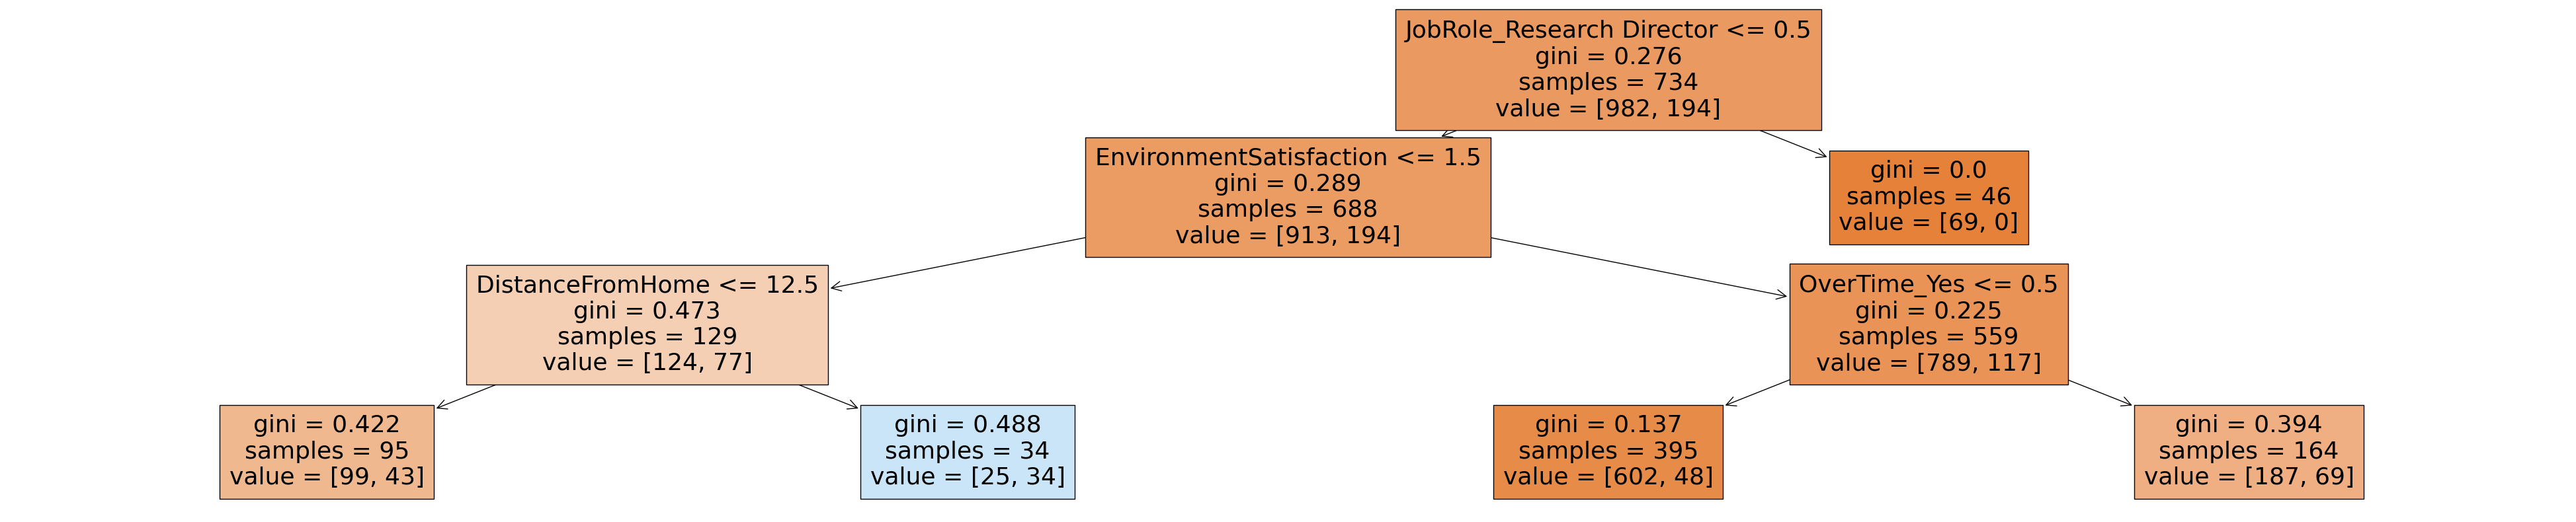

In [13]:
drawtree(rf.estimators_[0],xtrain.columns)

In [14]:
rf.estimators_[1] # accessing tree_1 at index 1 (2nd tree)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=2135392491)

# Plot 2nd tree from random forest

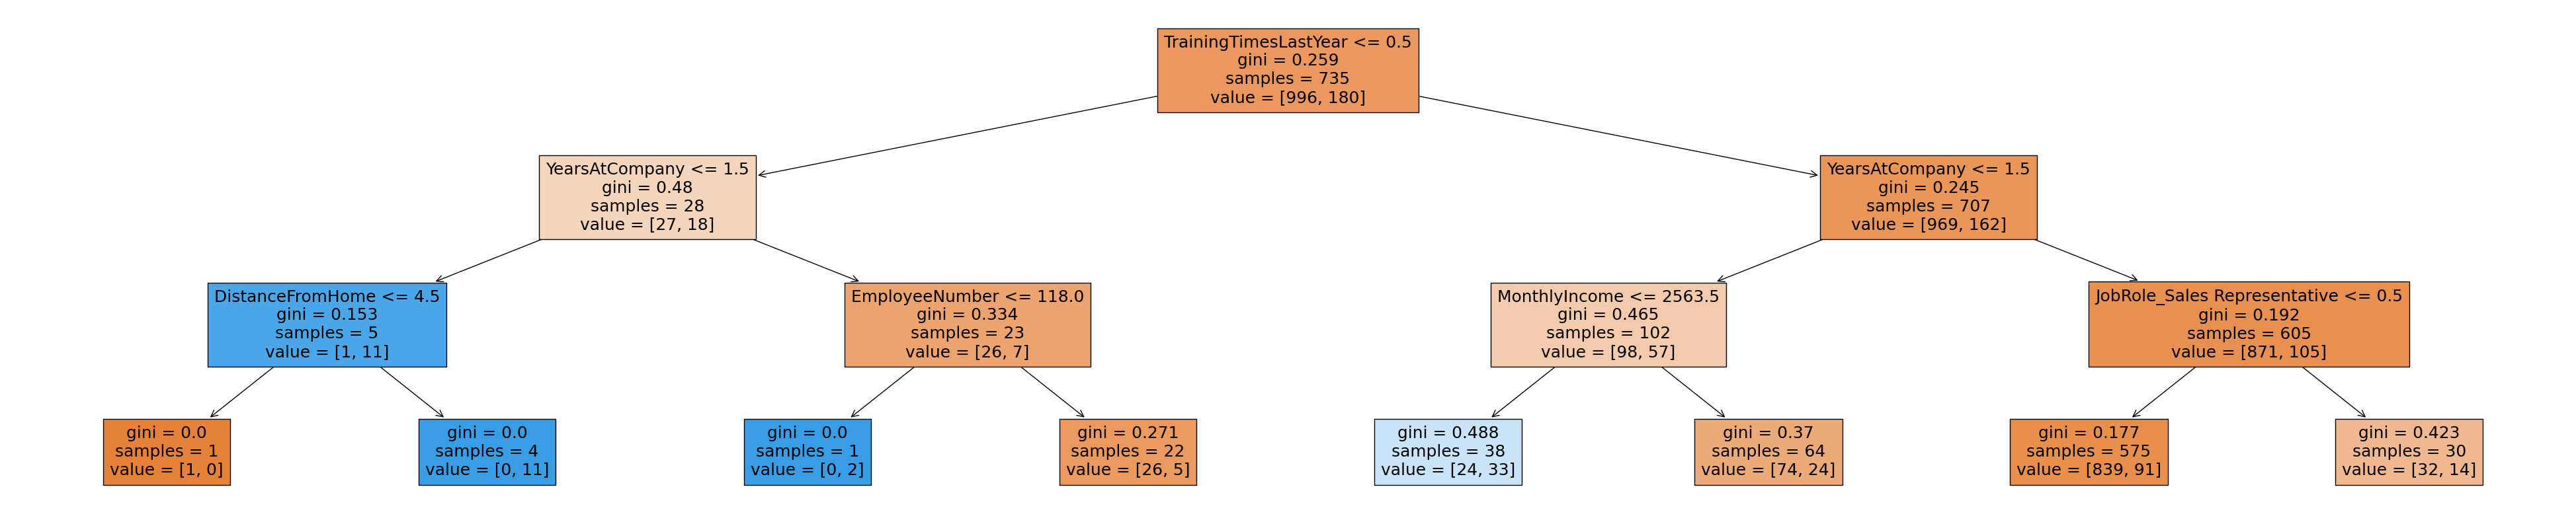

In [15]:
drawtree(rf.estimators_[1],xtrain.columns)

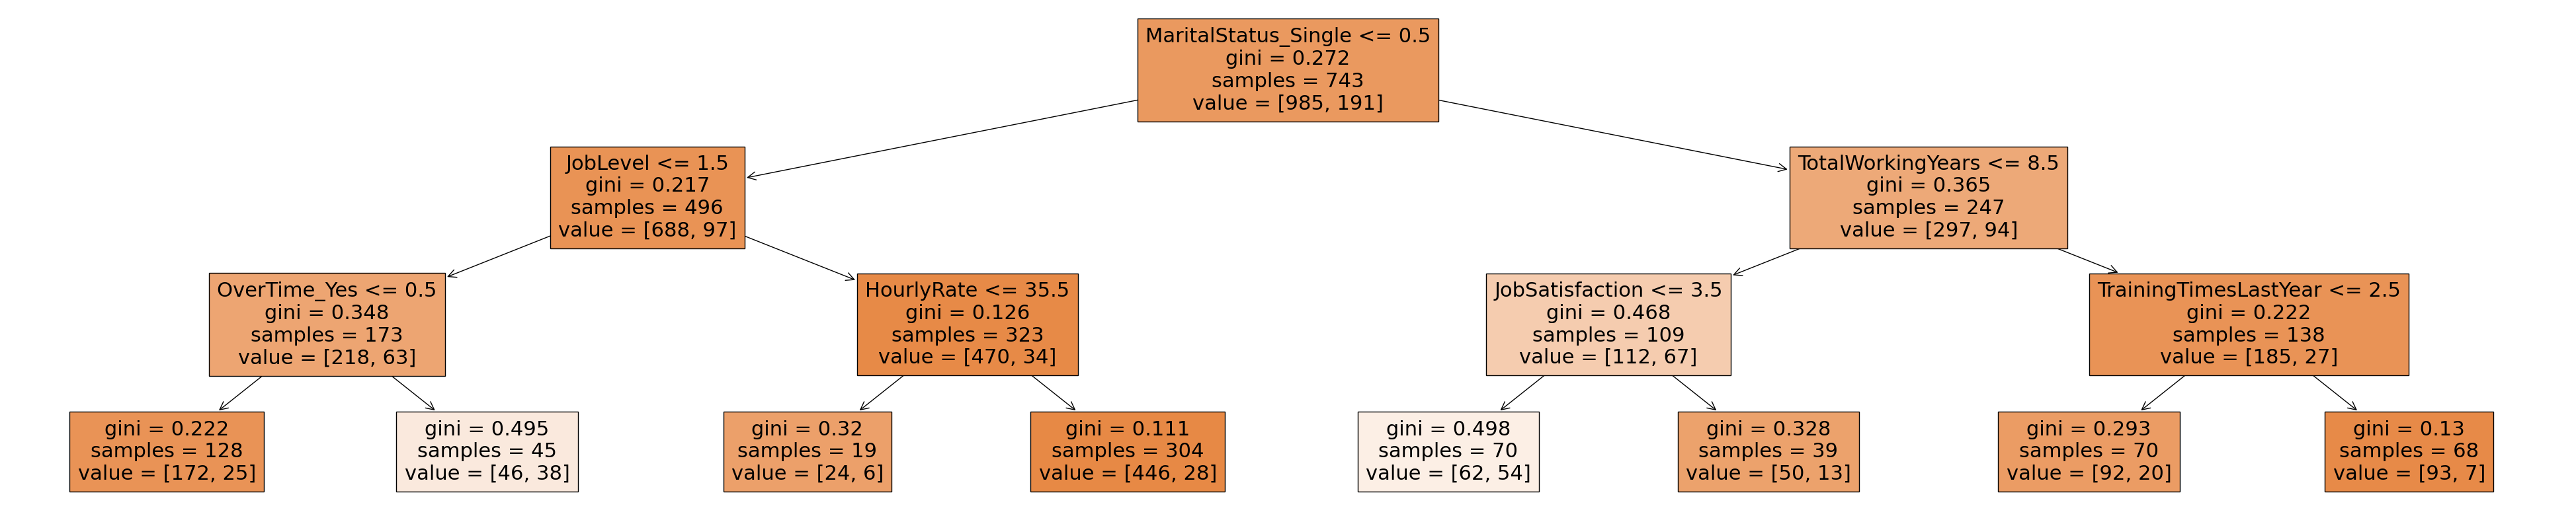

In [16]:
drawtree(rf.estimators_[2],xtrain.columns)

Here above u got different trees with different features as root node. In case if traditional bagging was applied, more or less all trees would be same. But random forest by taking different features in each tree, is trying to break that correlation.

# **Note** -> In all the tree graphs shown above
* At each index of different trees, different columns are coming at each root node based on which subsequent columns at other depths are selected 
* In this way we are giving importance to many columns to be on the root node based on which predictions can happen 
* Which brings out a lot of insight from our data because we try to explore multiple columns from different set of rows 

**max_depth** - We shouldn't specify this parameter but if we don't specify, we will get a very large depth of tree which will be difficult to build, compute and visualize.
* We can use '**.feature_importances_**' to know what kind of important columns we will get in the actual process of a particular decision tree of random forest
* **Importance is calculated based on how much a column/predictor has helped to reduce the gini impurity overall in a decision tree**

# Plot a horizonal-bar chart to display important columns using  '.feature_importances_' and without using 'max_depth' parameters for tree_0 and tree_1

Since we did not specify max depth parameter in below rf, when we plot we see tree reaches maximum depth inorder to split.

In [17]:
rf2 = RandomForestClassifier(n_estimators=5, random_state=1).fit(xtrain, ytrain)

In [18]:
rf2.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1791095845),
 DecisionTreeClassifier(max_features='auto', random_state=2135392491),
 DecisionTreeClassifier(max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_features='auto', random_state=1857819720),
 DecisionTreeClassifier(max_features='auto', random_state=491263)]

In [19]:
rf2.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1791095845)

In [20]:
rf2.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=2135392491)

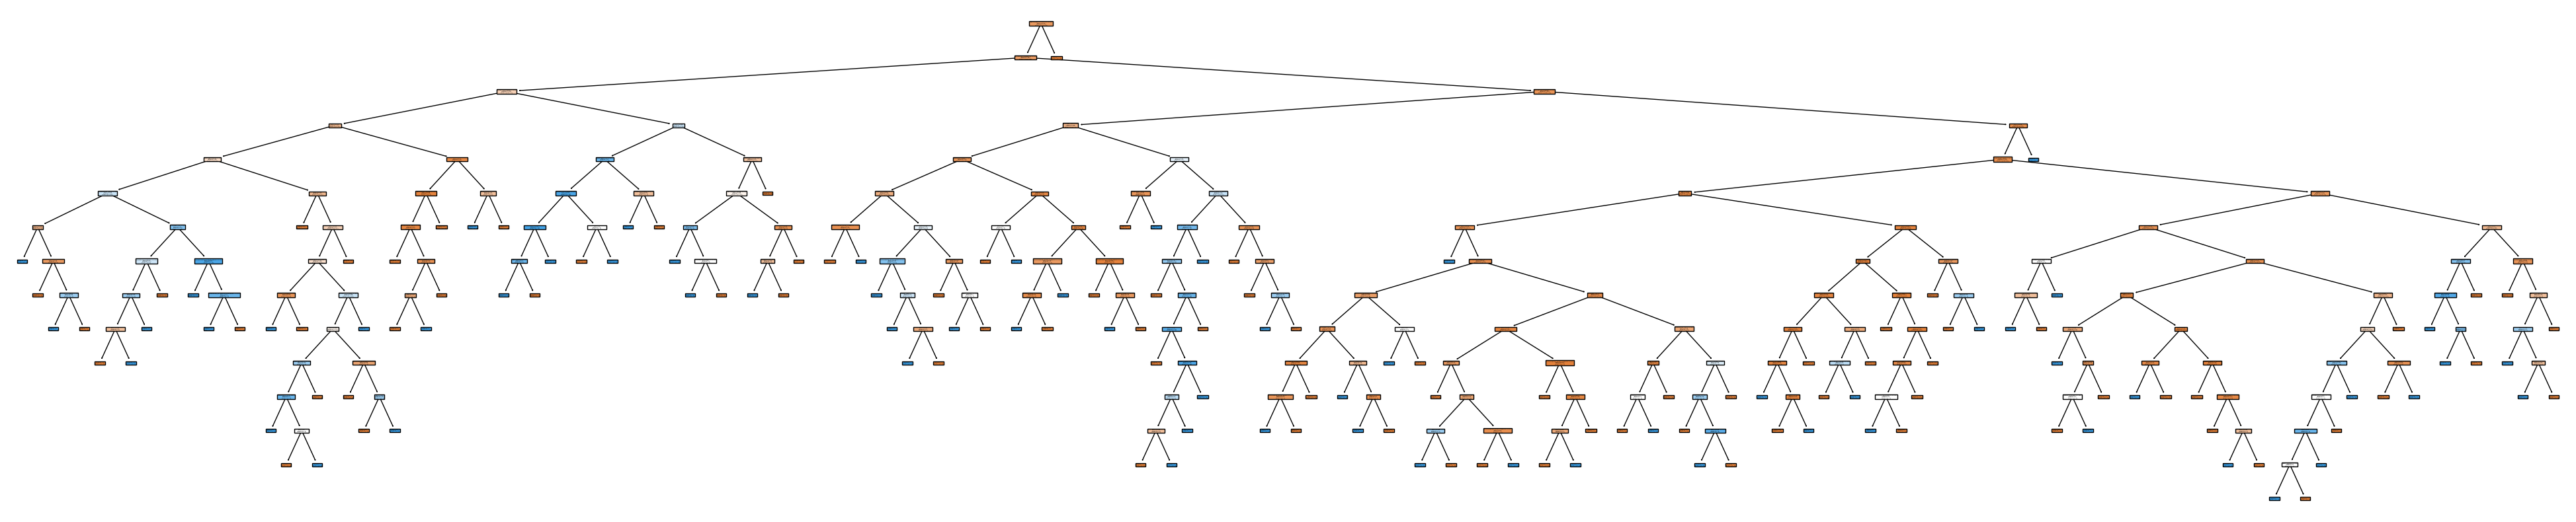

In [21]:
drawtree(rf2.estimators_[0],xtrain.columns)

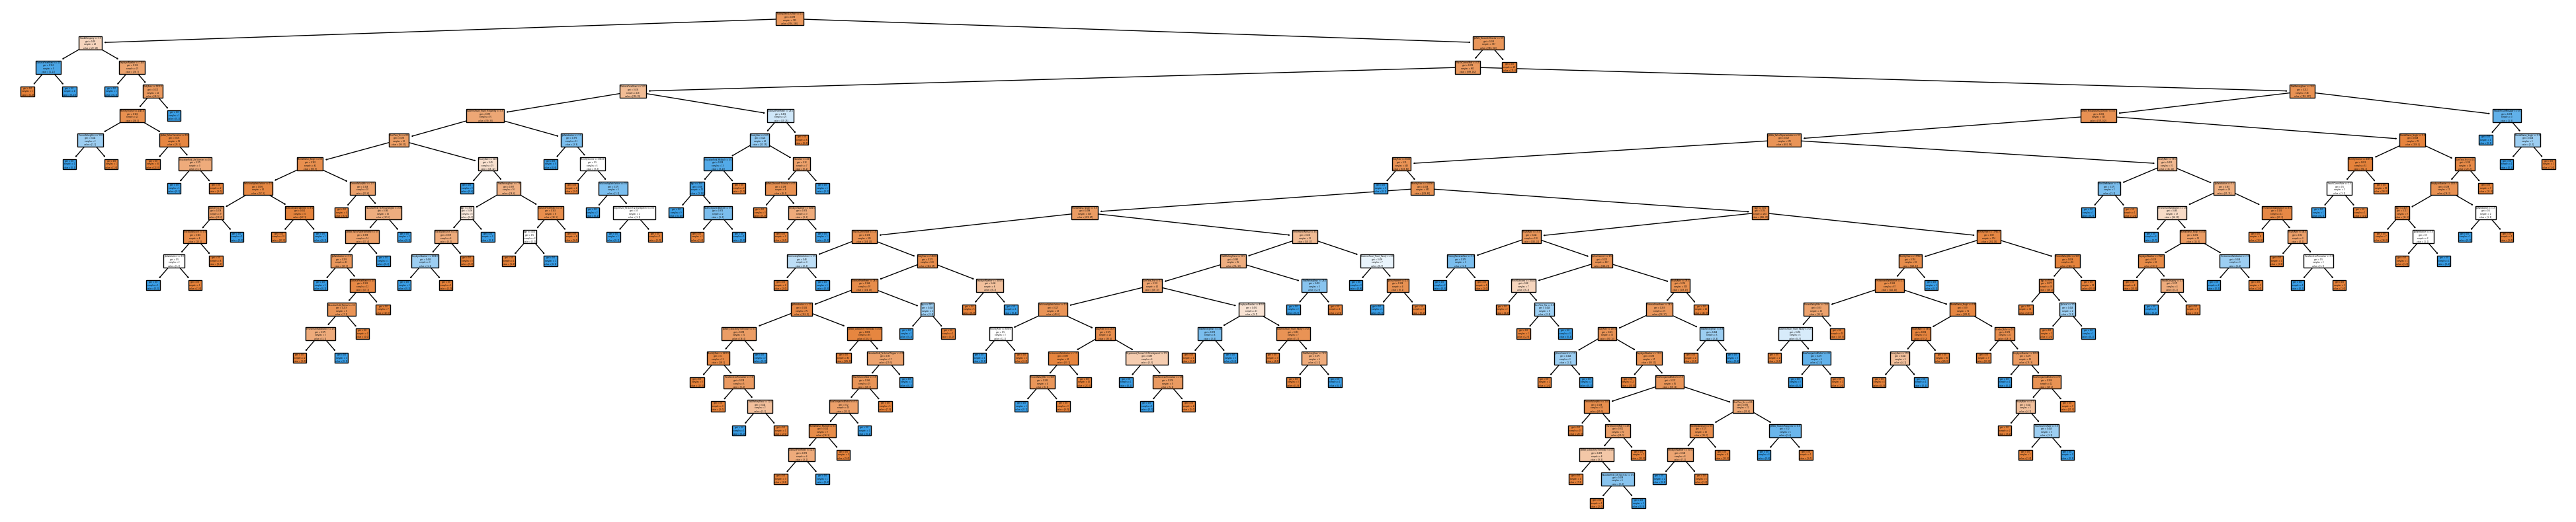

In [22]:
drawtree(rf2.estimators_[1],xtrain.columns)

Feature importance is calculated based on reduction in gini impurity.

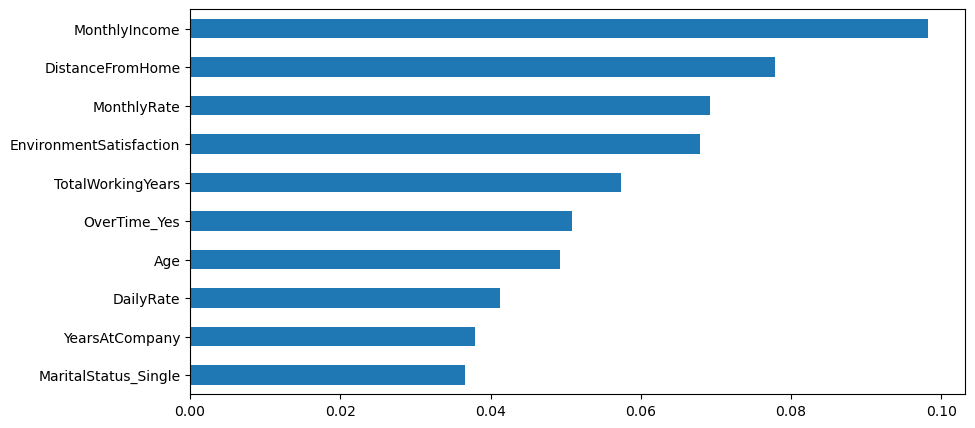

In [23]:
pd.Series(rf2.estimators_[0].feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5));


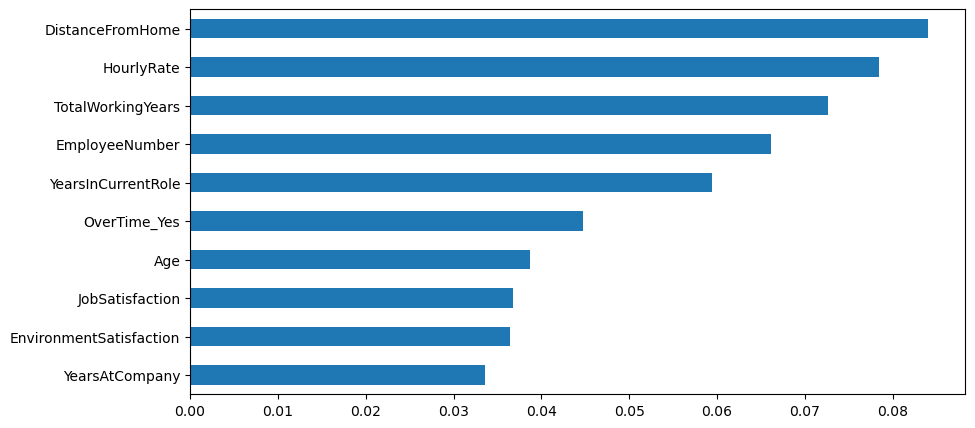

In [24]:
pd.Series(rf2.estimators_[1].feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5));


# Plot a horizonal-bar chart to display important columns using '.feature_importances_' and without using 'max_depth' parameters for entire random forest

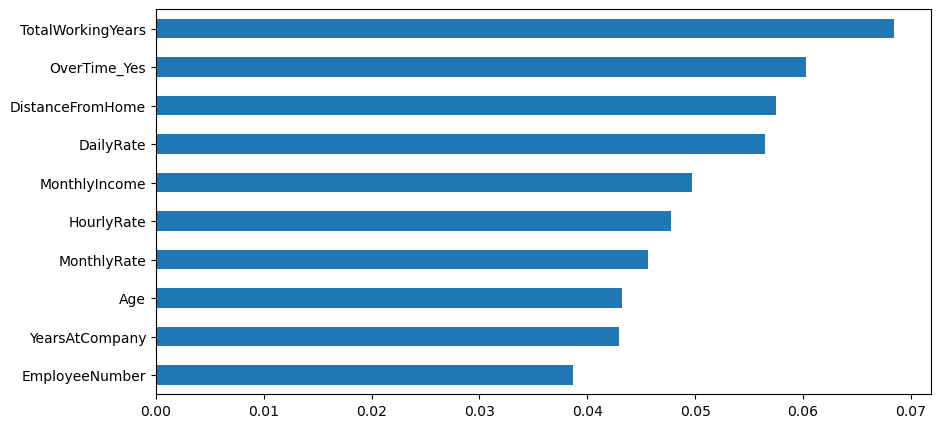

In [25]:

plt.figure(figsize=(5,3))
pd.Series(rf2.feature_importances_, index=xtrain.columns).sort_values(ascending=False).head(10)[::-1].plot.barh(figsize=(10,5));

# removed '.estimators_' parameter after rf2

## Can check OOB Score from trained model as rf internally uses Out of bag error during training to get idea of performance of model before actual test (its like a validation test).

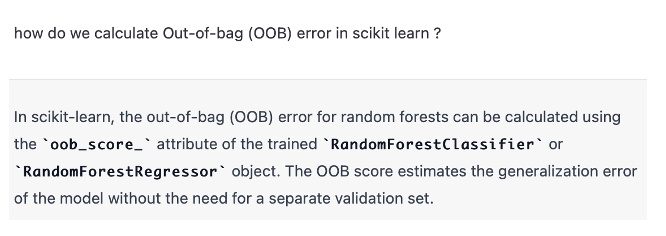

In [26]:
rf_oob = RandomForestClassifier(n_estimators=100, 
                                oob_score=True, 
                                random_state=1).fit(xtrain, ytrain)

In [27]:
oob_score = rf_oob.oob_score_
print('OOB score:', oob_score)

OOB score: 0.8647959183673469


# Predict individual classes for the data 

In [28]:
ypred = rf2.predict(xtest)
ypred[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

* Above results 0 at index 0 means emp will stay in the org
* 1 at index 1 means emp will leave the org
* In Random Forests prediction - it will try to work with every decision tree 
* For e.g if we take one test sample, it will try to predict what could be the target class using all decision trees of RF
* Which means that in above result for every test sample we have 5 predictions 

*Good accuracy in random forest cz it is working from a bagging perspective. <b>If u use any ml, dl method which is much more sophisticated (by sophisticated meaning has much more parameters to fit) than rf still rf can outplay these dl algo's.*</b>


<font color=blue>*rf wins cz ann lies towards 1 extreme where it cam model v complex relationships (low bias high variance model) & linear/logistic reg lies at other end where they model simple linear relationships (high bias low variance model), rf lies somewhere in sweet spot where it could provide a low bias as well as a low variance model*

*Logistic Regression is good for binary predictions. Multiple class predictions can go for rf, ann etc. When do not have access to lot of data can go for rf as it works on bagging which is based on bootstrap sampling so u can have many training subsets from data. Bootstrap sampling applied when u do not have a lot of data.*

*Class imbalance is problem in AI/ML u have to take care of it before applying AI,ML algo*

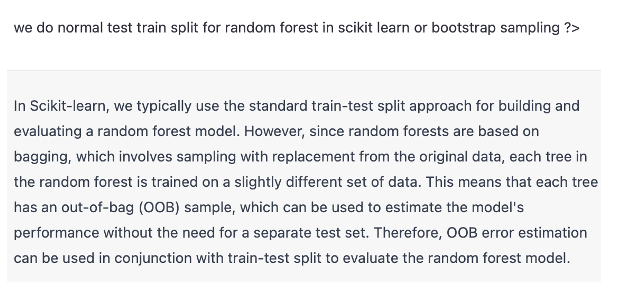

# Display predict probabilities for entire RF

In [29]:
pred_prob = rf2.predict_proba(xtest)
pred_prob[:10]       # Class 0 (emp stays) and Class 1 (emp leaves) probabilities

array([[0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2]])

* In above results - column_0 represents class 0 and column_1 represents class 1
* class 0 - emp stays (e.g-> 0.8)
* class 1 - emp leaves (e.g-> 0.2)

# Extract probability values from individual decision trees for 1st test sample

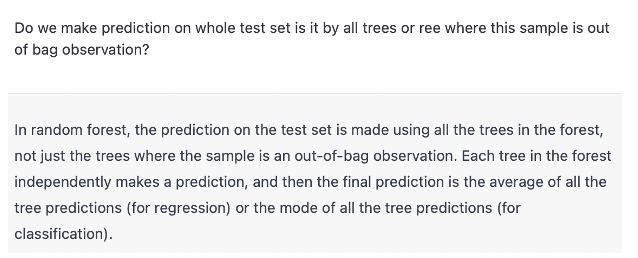

We have 5 estimators so all 5 trees will do prediction for both class 0 and class 1. Then will average it from all 5 trees for both class 0 and class 1. Whichever has a higher probability that class will be assigned to the sample. There is no threshold here.

In [30]:
for x in rf2.estimators_:
    print(x.predict_proba(xtest)[0])

[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]


- [1. 0.] - 1st DT predicts emp stays
- [0. 1.] - 2nd DT predicts emp leaves
- [1. 0.] - Rest DT predicts emp stays
- [1. 0.]
- [1. 0.]

### Calculations of probability:
*  taking sum of all probability values from every DT for that col (class 0) and dividing it by no of DT
* E.g -> 1+0+1+1+1 = 4
* No of DT = 5 
* Prob for **class_0** = 4/5 -> 0.8
* Prob for **class_1** = 1-Prob for **class_0** or 1/5 from col 2 
* You can verify these probabilities of 0.8 and 0.2 in rf2.predict_proba above also

**Note**- In RF we built multiple DT and tried to take avg of all predictions to report only one result 
* Averaging reduces the **variance** in the model. How ? lets say 1 model saus with 0.9 prob that emp will stay and rest 4 say emp will not leave then average reduces the variance w.r.t that one prediction.
* By growing the DT completely, **bias** will come down in all the DTrees  
* But since u need a low bias as well as a low variance as well so u need to decide on depth that gives u good accuracy- u can go for hyperparameter tuning - <b>Grid Search & Randomised Grid search r 2 ways which can help u decide number of number of trees/estimators to use</b>*

*If u r growing dt to max depth means it is more & more closely fitting to data, if stop to max depth=3 model will have comparatively higher bias but u will reduce variance* 
*There is always bias-variance trade off. If u increase bias, u reduce variance & vice versa. <font color=blue>In reality we need model with low bias and low variance*

*<font color=blue>Depending on theoritical distribution of data points, if model matches theoritical distribution of data points then only u can comment on biasness & variance of model. Models themselves cant be categorized as low/high bias or variance*

<b>For rf, it naturally works on bootstrap sampling & then averages predictions which reduces variance & which we need in reality (a low variance).</b>

# Build a RF to know exact no of DTs using 'RandomizedSearchCV'

### You can use this hyperparameter technique for other parameters as well like max_depth, criterion etc

In [31]:
params = {'n_estimators':list(range(1,100))}
rf3 = RandomForestClassifier() 
rscv = RandomizedSearchCV(estimator=rf3,
                          param_distributions=params, 
                          cv=5,
                          return_train_score=True, 
                          random_state=1).fit(xtrain, ytrain)


<font color=blue>*Since RandomizedSearchCV is a concept for hyperparameter selection it can be applied to any algorithm, so u can give estimator as rf, lr, svm etc i.e. can be applied to any algorithm.*

In [32]:
rscv.best_estimator_

RandomForestClassifier(n_estimators=33)

In [33]:
df_rscv = pd.DataFrame(rscv.cv_results_)
df_rscv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.116906      0.001553         0.006292        0.000153   
1       0.105792      0.001071         0.005773        0.000105   
2       0.041467      0.000744         0.002768        0.000077   
3       0.101634      0.001378         0.005542        0.000128   
4       0.098978      0.000462         0.005419        0.000113   
5       0.023594      0.000394         0.001912        0.000039   
6       0.045814      0.000724         0.003127        0.000288   
7       0.100902      0.001193         0.005485        0.000066   
8       0.109815      0.001185         0.005878        0.000109   
9       0.114256      0.000997         0.006049        0.000099   

  param_n_estimators                params  split0_test_score  \
0                 93  {'n_estimators': 93}           0.855932   
1                 84  {'n_estimators': 84}           0.851695   
2                 33  {'n_estimators': 33}           0.860169   
3                 81  {'n_estimators': 81}           0.855932   
4                 79  {'n_estimators': 79}           0.851695   
5                 18  {'n_estimators': 18}           0.838983   
6                 36  {'n_estimators': 36}           0.855932   
7                 82  {'n_estimators': 82}           0.843220   
8                 89  {'n_estimators': 89}           0.855932   
9                 92  {'n_estimators': 92}           0.847458   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.863830           0.855319           0.863830  ...   
1           0.863830           0.859574           0.859574  ...   
2           0.863830           0.855319           0.872340  ...   
3           0.868085           0.855319           0.859574  ...   
4           0.863830           0.863830           0.863830  ...   
5           0.859574           0.859574           0.859574  ...   
6           0.872340           0.859574           0.859574  ...   
7           0.855319           0.863830           0.859574  ...   
8           0.863830           0.851064           0.863830  ...   
9           0.872340           0.851064           0.868085  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.860548        0.004024                4            1.000000   
1         0.858850        0.003939                6            1.000000   
2         0.862247        0.005724                1            1.000000   
3         0.859697        0.004555                5            1.000000   
4         0.861403        0.004854                3            1.000000   
5         0.855456        0.008237               10            0.994681   
6         0.857995        0.009523                7            0.998936   
7         0.857155        0.007649                9            1.000000   
8         0.857995        0.005051                8            1.000000   
9         0.861406        0.010102                2            0.998936   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            0.998937            0.998937            1.000000   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   
5            0.993624            0.992561            0.992561   
6            0.998937            0.998937            1.000000   
7            1.000000            1.000000            0.998937   
8            1.000000            1.000000            1.000000   
9            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.998937          0.999787         0.000425  
1            1.000000          1.000000         0.000000  
2            0.996812          0.998937         0.001164  
3            1.000000          1.

### Plot the train error vs test error to know optimal 'n_estimators'

In [34]:
df_rscv = df_rscv.sort_values('param_n_estimators')
df_rscv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.023594      0.000394         0.001912        0.000039   
2       0.041467      0.000744         0.002768        0.000077   
6       0.045814      0.000724         0.003127        0.000288   
4       0.098978      0.000462         0.005419        0.000113   
3       0.101634      0.001378         0.005542        0.000128   
7       0.100902      0.001193         0.005485        0.000066   
1       0.105792      0.001071         0.005773        0.000105   
8       0.109815      0.001185         0.005878        0.000109   
9       0.114256      0.000997         0.006049        0.000099   
0       0.116906      0.001553         0.006292        0.000153   

  param_n_estimators                params  split0_test_score  \
5                 18  {'n_estimators': 18}           0.838983   
2                 33  {'n_estimators': 33}           0.860169   
6                 36  {'n_estimators': 36}           0.855932   
4                 79  {'n_estimators': 79}           0.851695   
3                 81  {'n_estimators': 81}           0.855932   
7                 82  {'n_estimators': 82}           0.843220   
1                 84  {'n_estimators': 84}           0.851695   
8                 89  {'n_estimators': 89}           0.855932   
9                 92  {'n_estimators': 92}           0.847458   
0                 93  {'n_estimators': 93}           0.855932   

   split1_test_score  split2_test_score  split3_test_score  ...  \
5           0.859574           0.859574           0.859574  ...   
2           0.863830           0.855319           0.872340  ...   
6           0.872340           0.859574           0.859574  ...   
4           0.863830           0.863830           0.863830  ...   
3           0.868085           0.855319           0.859574  ...   
7           0.855319           0.863830           0.859574  ...   
1           0.863830           0.859574           0.859574  ...   
8           0.863830           0.851064           0.863830  ...   
9           0.872340           0.851064           0.868085  ...   
0           0.863830           0.855319           0.863830  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
5         0.855456        0.008237               10            0.994681   
2         0.862247        0.005724                1            1.000000   
6         0.857995        0.009523                7            0.998936   
4         0.861403        0.004854                3            1.000000   
3         0.859697        0.004555                5            1.000000   
7         0.857155        0.007649                9            1.000000   
1         0.858850        0.003939                6            1.000000   
8         0.857995        0.005051                8            1.000000   
9         0.861406        0.010102                2            0.998936   
0         0.860548        0.004024                4            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
5            0.993624            0.992561            0.992561   
2            0.998937            0.998937            1.000000   
6            0.998937            0.998937            1.000000   
4            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   
7            1.000000            1.000000            0.998937   
1            1.000000            1.000000            1.000000   
8            1.000000            1.000000            1.000000   
9            1.000000            1.000000            1.000000   
0            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
5            0.991498          0.992985         0.001082  
2            0.996812          0.998937         0.001164  
6            0.998937          0.999150         0.000425  
4            1.000000          1.

# PLot training and testing scores

(0.0, 1.1)

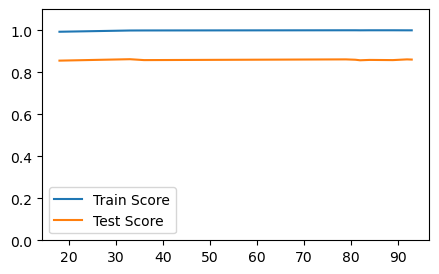

In [35]:
plt.figure(figsize=(5,3))
plt.plot(df_rscv['param_n_estimators'].values, df_rscv['mean_train_score'].values)
plt.plot(df_rscv['param_n_estimators'].values, df_rscv['mean_test_score'].values)
plt.legend(['Train Score', 'Test Score'])
plt.ylim(0,1.1)

In [36]:
df_rscv['param_n_estimators'].values

array([18, 33, 36, 79, 81, 82, 84, 89, 92, 93], dtype=object)

In [37]:
df_rscv['mean_train_score'].values

array([0.99298505, 0.9989373 , 0.99914961, 1.        , 1.        ,
       0.99978746, 1.        , 1.        , 0.99978723, 0.99978746])

In [38]:
df_rscv['mean_test_score'].values

array([0.85545618, 0.86224666, 0.85799495, 0.86140281, 0.85969708,
       0.85715471, 0.85884962, 0.85799495, 0.86140642, 0.86054814])

* From above graph we can see that around 10 estimators are best for the model and beyond 10, both train and test scores are not improving anymore

# Build a RF with a specific range to know exact no of DTs using 'GridSearchCV'

In [39]:
params = {'n_estimators':list(range(2,20))}
rf4 = RandomForestClassifier() 
gscv = GridSearchCV(estimator=rf4, 
                    param_grid=params, 
                    cv=5, 
                    return_train_score=True).fit(xtrain, ytrain)

In [40]:
df_gscv = pd.DataFrame(gscv.cv_results_)
df_gscv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004068      0.000414         0.001112        0.000151   
1        0.005209      0.000100         0.001131        0.000089   
2        0.006435      0.000166         0.001098        0.000009   
3        0.007630      0.000131         0.001157        0.000005   
4        0.008788      0.000154         0.001209        0.000048   
5        0.009707      0.000113         0.001249        0.000021   
6        0.010978      0.000183         0.001293        0.000019   
7        0.012451      0.000163         0.001406        0.000045   
8        0.013649      0.000271         0.001431        0.000008   
9        0.014913      0.000163         0.001504        0.000023   
10       0.016244      0.000213         0.001544        0.000007   
11       0.017443      0.000338         0.001602        0.000008   
12       0.018893      0.000398         0.001790        0.000116   
13       0.020170      0.000367         0.001834        0.000113   
14       0.021005      0.000258         0.001763        0.000010   
15       0.021864      0.000295         0.001839        0.000096   
16       0.023546      0.000131         0.001906        0.000100   
17       0.024876      0.000340         0.001948        0.000010   

   param_n_estimators                params  split0_test_score  \
0                   2   {'n_estimators': 2}           0.830508   
1                   3   {'n_estimators': 3}           0.826271   
2                   4   {'n_estimators': 4}           0.838983   
3                   5   {'n_estimators': 5}           0.851695   
4                   6   {'n_estimators': 6}           0.843220   
5                   7   {'n_estimators': 7}           0.838983   
6                   8   {'n_estimators': 8}           0.860169   
7                   9   {'n_estimators': 9}           0.817797   
8                  10  {'n_estimators': 10}           0.855932   
9                  11  {'n_estimators': 11}           0.843220   
10                 12  {'n_estimators': 12}           0.838983   
11                 13  {'n_estimators': 13}           0.851695   
12                 14  {'n_estimators': 14}           0.851695   
13                 15  {'n_estimators': 15}           0.855932   
14                 16  {'n_estimators': 16}           0.855932   
15                 17  {'n_estimators': 17}           0.851695   
16                 18  {'n_estimators': 18}           0.834746   
17                 19  {'n_estimators': 19}           0.843220   

    split1_test_score  split2_test_score  split3_test_score  ...  \
0            0.838298           0.846809           0.829787  ...   
1            0.808511           0.846809           0.817021  ...   
2            0.846809           0.842553           0.842553  ...   
3            0.834043           0.846809           0.838298  ...   
4            0.851064           0.859574           0.846809  ...   
5            0.838298           0.863830           0.829787  ...   
6            0.876596           0.855319           0.863830  ...   
7            0.855319           0.855319           0.851064  ...   
8            0.863830           0.859574           0.855319  ...   
9            0.868085           0.876596           0.855319  ...   
10           0.842553           0.859574           0.868085  ...   
11           0.851064           0.872340           0.868085  ...   
12           0.855319           0.859574           0.859574  ...   
13           0.851064           0.859574           0.868085  ...   
14           0.872340           0.859574           0.868085  ...   
15           0.863830           0.842553           0.859574  ...   
16           0.863830           0.855319           0.859574  ...   
17           0.834043           0.859574           0.876596  ...   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.837591        0.006651               17            0.941489   
1          

### Plot the train error vs test error to know optimal 'n_estimators'

In [41]:
df_gscv = df_gscv.sort_values('param_n_estimators')
df_gscv

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004068      0.000414         0.001112        0.000151   
1        0.005209      0.000100         0.001131        0.000089   
2        0.006435      0.000166         0.001098        0.000009   
3        0.007630      0.000131         0.001157        0.000005   
4        0.008788      0.000154         0.001209        0.000048   
5        0.009707      0.000113         0.001249        0.000021   
6        0.010978      0.000183         0.001293        0.000019   
7        0.012451      0.000163         0.001406        0.000045   
8        0.013649      0.000271         0.001431        0.000008   
9        0.014913      0.000163         0.001504        0.000023   
10       0.016244      0.000213         0.001544        0.000007   
11       0.017443      0.000338         0.001602        0.000008   
12       0.018893      0.000398         0.001790        0.000116   
13       0.020170      0.000367         0.001834        0.000113   
14       0.021005      0.000258         0.001763        0.000010   
15       0.021864      0.000295         0.001839        0.000096   
16       0.023546      0.000131         0.001906        0.000100   
17       0.024876      0.000340         0.001948        0.000010   

   param_n_estimators                params  split0_test_score  \
0                   2   {'n_estimators': 2}           0.830508   
1                   3   {'n_estimators': 3}           0.826271   
2                   4   {'n_estimators': 4}           0.838983   
3                   5   {'n_estimators': 5}           0.851695   
4                   6   {'n_estimators': 6}           0.843220   
5                   7   {'n_estimators': 7}           0.838983   
6                   8   {'n_estimators': 8}           0.860169   
7                   9   {'n_estimators': 9}           0.817797   
8                  10  {'n_estimators': 10}           0.855932   
9                  11  {'n_estimators': 11}           0.843220   
10                 12  {'n_estimators': 12}           0.838983   
11                 13  {'n_estimators': 13}           0.851695   
12                 14  {'n_estimators': 14}           0.851695   
13                 15  {'n_estimators': 15}           0.855932   
14                 16  {'n_estimators': 16}           0.855932   
15                 17  {'n_estimators': 17}           0.851695   
16                 18  {'n_estimators': 18}           0.834746   
17                 19  {'n_estimators': 19}           0.843220   

    split1_test_score  split2_test_score  split3_test_score  ...  \
0            0.838298           0.846809           0.829787  ...   
1            0.808511           0.846809           0.817021  ...   
2            0.846809           0.842553           0.842553  ...   
3            0.834043           0.846809           0.838298  ...   
4            0.851064           0.859574           0.846809  ...   
5            0.838298           0.863830           0.829787  ...   
6            0.876596           0.855319           0.863830  ...   
7            0.855319           0.855319           0.851064  ...   
8            0.863830           0.859574           0.855319  ...   
9            0.868085           0.876596           0.855319  ...   
10           0.842553           0.859574           0.868085  ...   
11           0.851064           0.872340           0.868085  ...   
12           0.855319           0.859574           0.859574  ...   
13           0.851064           0.859574           0.868085  ...   
14           0.872340           0.859574           0.868085  ...   
15           0.863830           0.842553           0.859574  ...   
16           0.863830           0.855319           0.859574  ...   
17           0.834043           0.859574           0.876596  ...   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.837591        0.006651               17            0.941489   
1          

(0.0, 1.1)

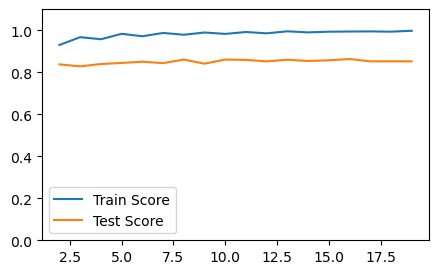

In [42]:
plt.figure(figsize=(5,3))

plt.plot(df_gscv['param_n_estimators'], df_gscv['mean_train_score'])
plt.plot(df_gscv['param_n_estimators'], df_gscv['mean_test_score'])
plt.legend(['Train Score', 'Test Score'])
plt.ylim(0,1.1)

# Find best no of estimators

In [43]:
gscv.best_params_ # to know best no of estimators

{'n_estimators': 16}

# Calc accuracy score via best DT 

In [44]:
ypred = gscv.best_estimator_.predict(xtest)
accuracy_score(ytest, ypred)

0.8299319727891157

In [45]:
#***************************************************************************************#
#***************************************************************************************#


# ====Intro to Sequential Ensembles=============

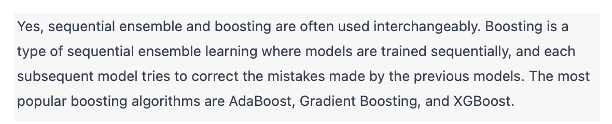

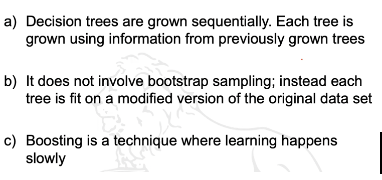

Since it is a Sequential learning, it is slow learning.

## 2. Sequential Ensembles 

### Boosting Algorithm

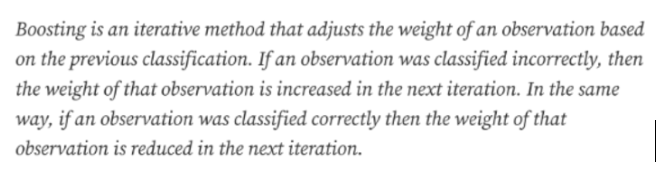

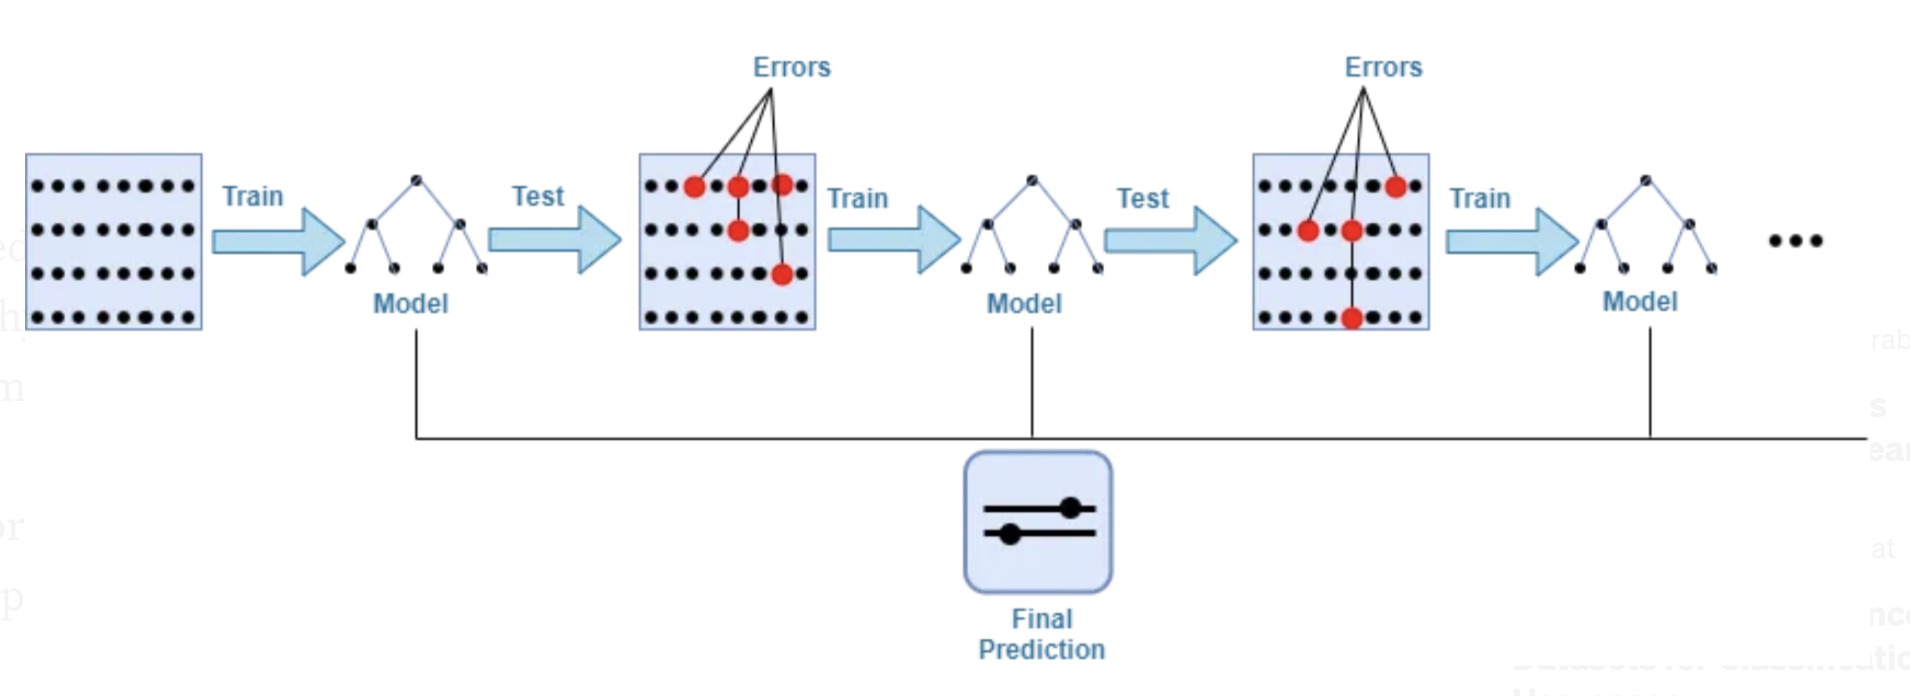

Boosting is Sequential in nature. Model2 is influenced by Model1, Model3 is influenced by Model2 etc so it is sequential in nature.

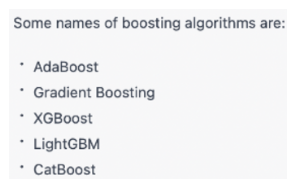

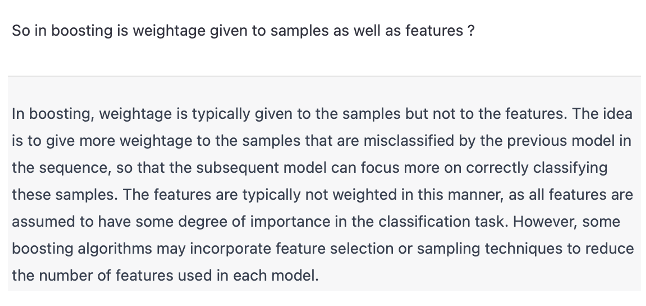

### 1. AdaBoost Algorithm

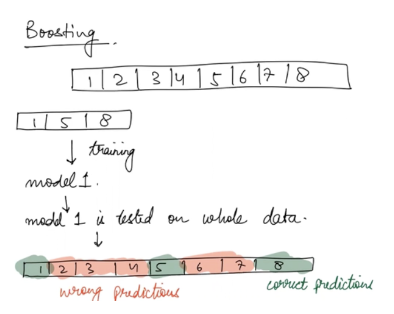

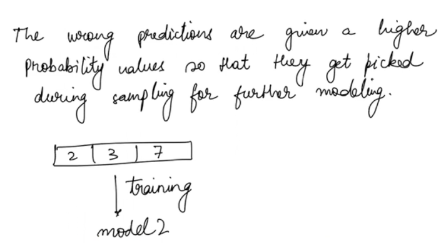

- If u r giving `n data points` to 1st model u will also give `n data points` to 2nd model. 


- The n data points picked for 1st model may be random but the data points picked for 2nd model it is more likely that picked samples will be out of those which were misclassified by 1st Model cz after 1st model was complete it was tested on all possible data and higher probability was assigned to points which were misclassified by 1st Model. 


- So when 2nd Model picks a set of `n data points` from whole dataset it is more likely samples with higher weightage as assigned by 1st Model will be picked.Then Model2 will be evaluated again on whole dataset points & it will assign higher probabilities to data points that were misclassified by it.


- So 3rd model will likely pick in its `n data points` the samples which were misclassified by 2nd model as they will be having higher probability of being picked up. 

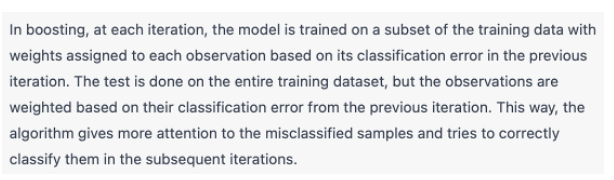

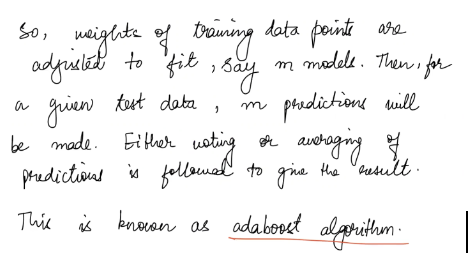

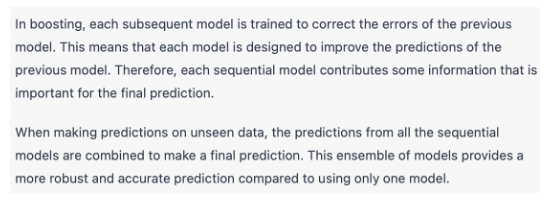

## <font color=blue>How predictions from each model are combined in Boosting or how aggregation is done in Boosting ? 
         Weighted Average
    
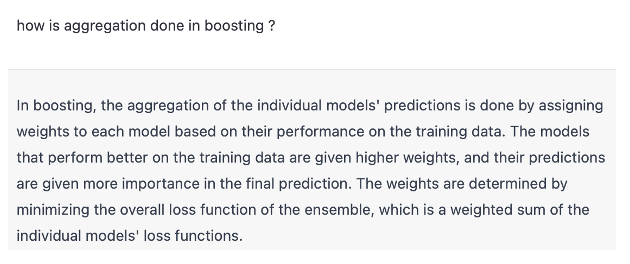





### 2. Gradient Boosting Algorithm

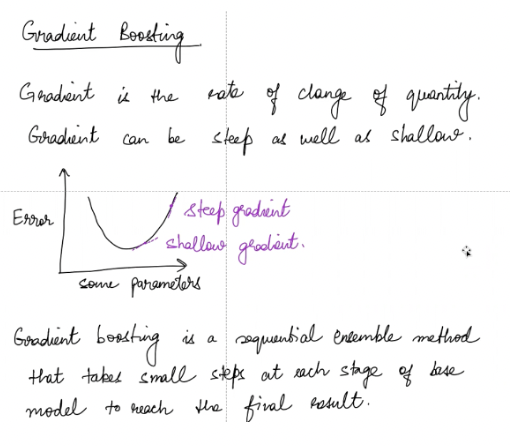

Steep Gradient so learning is happening very fast.

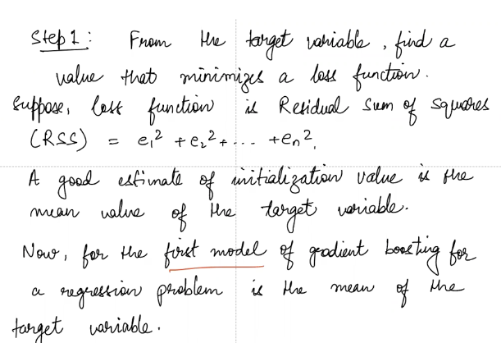

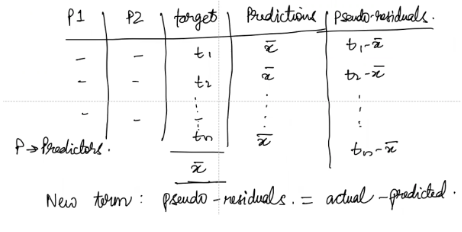

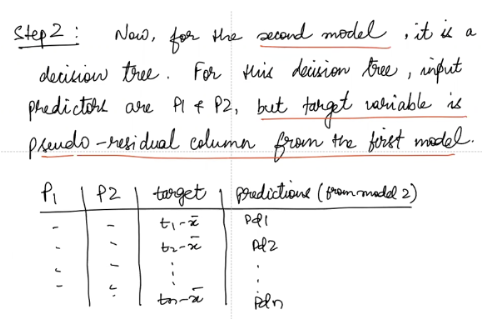

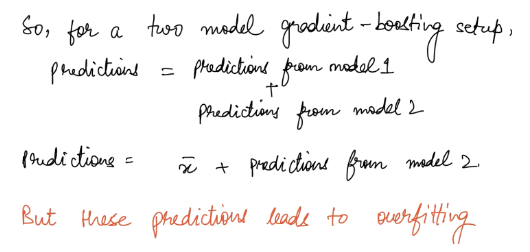

Overfitting can happen when your learning is very fast, so you have to go in small steps.

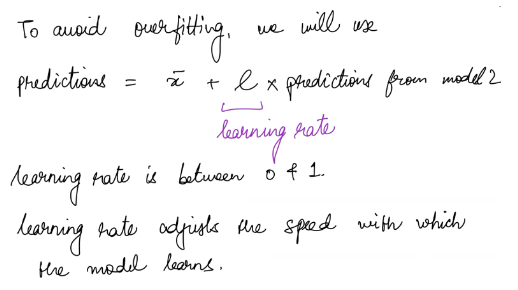

*<font color=blue>In Gradient Boosting u keep on adding predictions from previous models.*

In below table, pseudo-residuals are obtained as t1, t2 ..etc  were original targets and you subtact the **predictions of model1 and model2** from this which is as shown below-


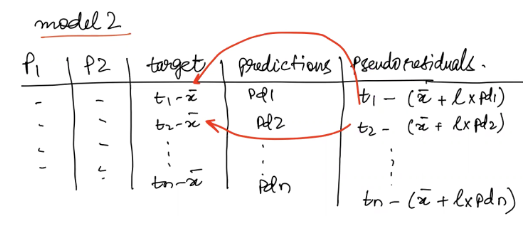

Similarly we do for Model3 etc.

*<font color=blue>It is generally seen that pseudo-residuals for model2 are less than pseudo-residuals for model1 so this implies that Gradient boosting approach is towards the minimization of the residuls.*
    
As your residuals keep on decreasing that means ur model is learning better & better at each step.

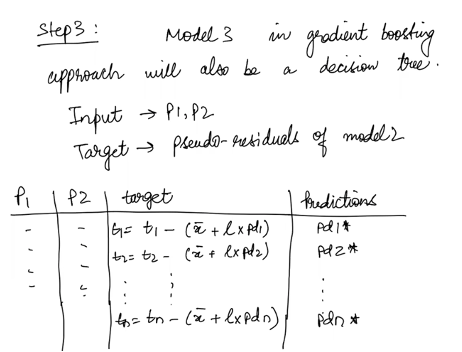

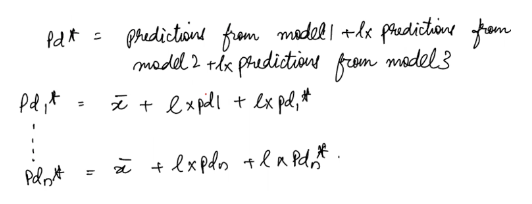

###  Note**

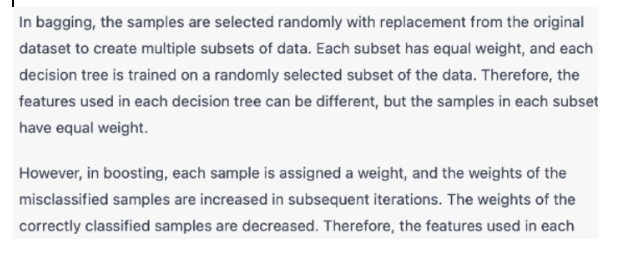

# =========Algorithm Gradient Boosting===========

In [46]:
#***************************************************************************************#
#***************************************************************************************#


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=50, random_state=0)
gb.fit(xtrain, ytrain)
gb.score(xtest, ytest)

0.8333333333333334

In [48]:
ypred = gb.predict(xtest)
ypred[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
pred_prob = gb.predict_proba(xtest)
pred_prob[:10]

array([[0.9189261 , 0.0810739 ],
       [0.06606116, 0.93393884],
       [0.43487311, 0.56512689],
       [0.69806318, 0.30193682],
       [0.8785274 , 0.1214726 ],
       [0.96158968, 0.03841032],
       [0.92100267, 0.07899733],
       [0.86806118, 0.13193882],
       [0.91026727, 0.08973273],
       [0.9352927 , 0.0647073 ]])

In [50]:
from sklearn.metrics import roc_curve, f1_score, auc
f1_score(ytest, ypred)

0.3950617283950617

In [51]:
prob_positive = pred_prob[:,1] 
prob_positive
fpr, tpr, threshold = roc_curve(ytest, prob_positive)
roc_auc = auc(fpr, tpr)

In [52]:
def plot_roc(roc_auc, fpr, tpr): 
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'red', label= 'AUC%0.2f'%roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

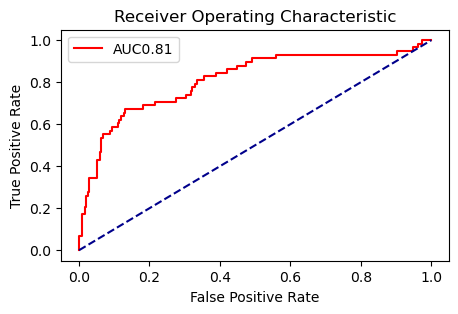

In [53]:
plt.figure(figsize=(5,3))
plot_roc(roc_auc, fpr, tpr)

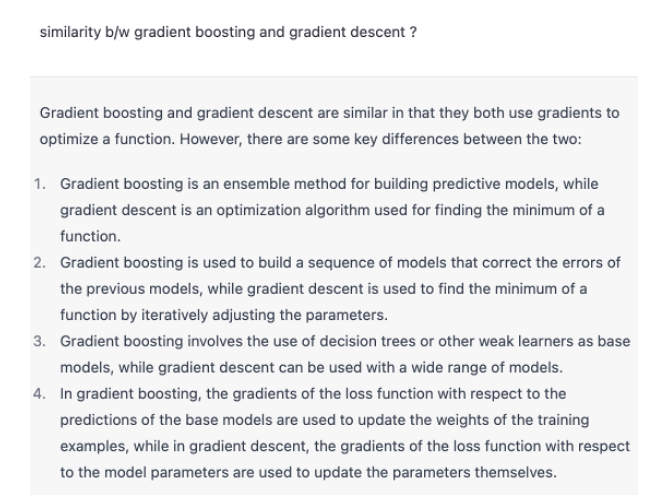

- IN `BAGGING`, all bootstrap training samples for each model has same weights 
- IN `BOOSTING`, samples are weighted based on predictions, they are weighted more if incorrectly classified, as to enhance chance of that sample being picked by next model

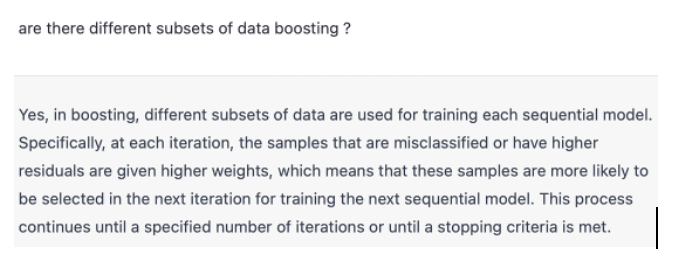

# References

1. Bootstrap Sampling - https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/


2. Ensemble learning - https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/


3. Bagging, Boosting - https://towardsdatascience.com/advanced-ensemble-learning-techniques-bf755e38cbfb#:~:text=Parallel%20Ensemble%20Methods,and%20voting%20for%20classification%20problems).

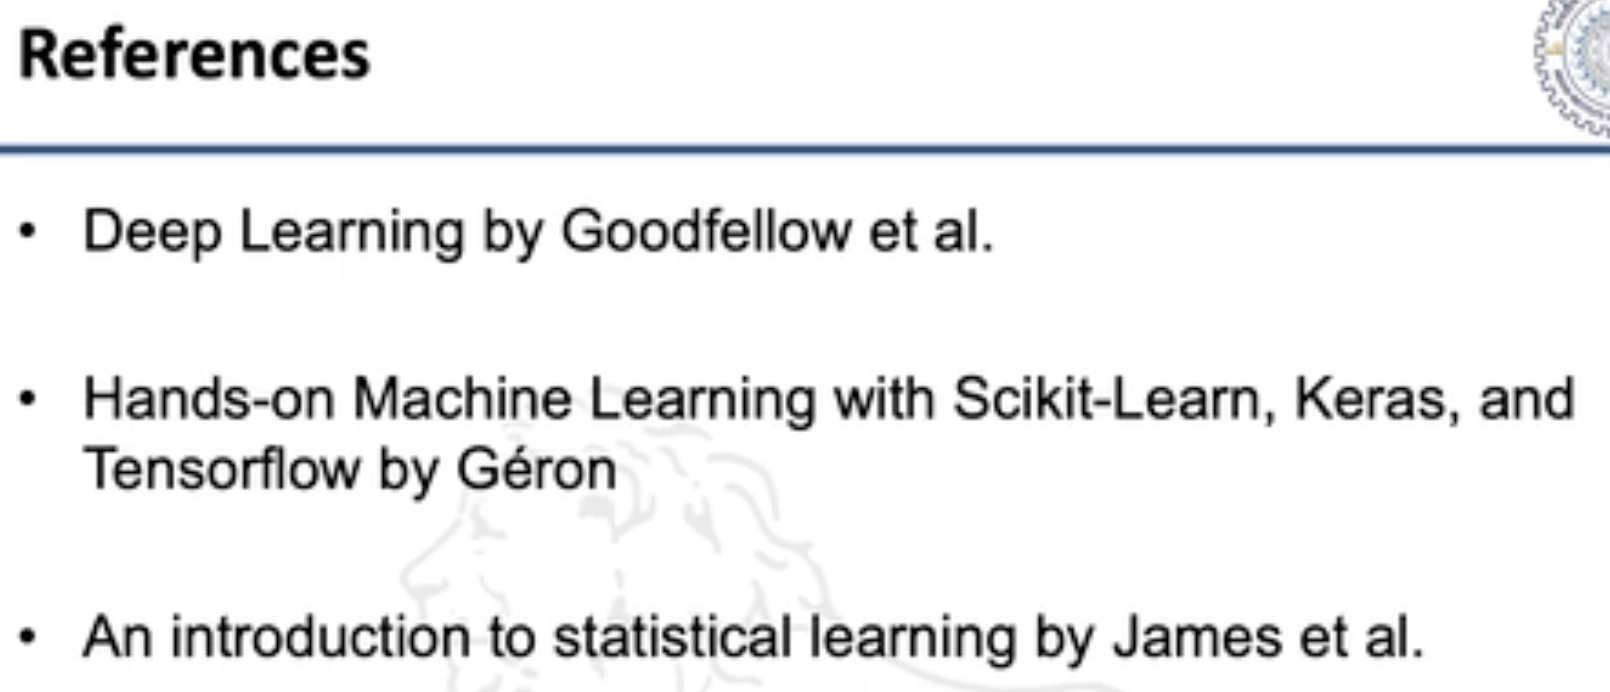

Introduction to Statistical Learning (2013 edition)